In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./train.csv')
df

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [247]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
train_data = df.iloc[:-200, 3:]
train_data = np.array(train_data).reshape(-1,28,28,1)
train_label = df['digit'][:-200]
train_letter = df['letter'][:-200]
train_label = encoder.fit_transform(np.array(train_label).reshape(-1,1))
train_label = train_label.toarray()

test_data = df.iloc[-200:, 3:]
test_data = np.array(test_data).reshape(-1,28,28,1)
test_label = df['digit'][-200:]
test_letter = df['letter'][-200:]
test_label = encoder.fit_transform(np.array(test_label).reshape(-1,1))
test_label = test_label.toarray()


(1848, 28, 28, 1) (200, 28, 28, 1)


8 S


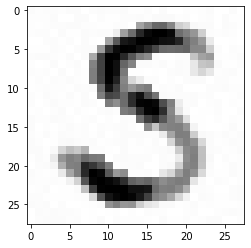

In [281]:
index = 306
sample = np.array(train_data[index,:])
print(df.iloc[index,1],df.iloc[index,2])
sample = sample.reshape(28,28)
plt.imshow(sample,cmap='binary')

In [275]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization

def cnn():
    model = Sequential()

    model.add(Conv2D(input_shape=(28,28,1),filters = 25, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 28, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Conv2D(filters = 28, kernel_size = (1,1), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 28, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 28, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Conv2D(filters = 28, kernel_size = (1,1), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 28, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 28, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model


In [276]:
model = cnn()

In [279]:
model.fit(train_data,train_label,batch_size=64,epochs=30,validation_split=0.2)

Train on 1478 samples, validate on 370 samples
Epoch 1/30
1478/1478 [==============================] - 1s 789us/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 1.3187 - val_accuracy: 0.6919
Epoch 2/30
1478/1478 [==============================] - 1s 780us/step - loss: 0.0456 - accuracy: 0.9871 - val_loss: 1.1564 - val_accuracy: 0.7351
Epoch 3/30
1478/1478 [==============================] - 1s 738us/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 1.0860 - val_accuracy: 0.7432
Epoch 4/30
1478/1478 [==============================] - 1s 743us/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.0900 - val_accuracy: 0.7324
Epoch 5/30
1478/1478 [==============================] - 1s 750us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.0798 - val_accuracy: 0.7351
Epoch 6/30
1478/1478 [==============================] - 1s 754us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1007 - val_accuracy: 0.7378
Epoch 7/30
1478/1478 [==============================] - 1s 759us/step - loss:

In [280]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

predict = model.predict(test_data)
result = np.argmax(predict,axis=1)
accuracy_score(result,df['digit'][-200:])

0.77

In [285]:
result,np.array(df['digit'][-200:])

(array([9, 7, 0, 6, 0, 8, 8, 8, 9, 2, 5, 6, 2, 3, 5, 2, 1, 4, 5, 3, 0, 1,
        7, 7, 3, 3, 2, 5, 9, 3, 2, 3, 5, 1, 9, 8, 5, 4, 8, 7, 0, 6, 2, 1,
        4, 3, 9, 5, 1, 3, 9, 8, 2, 4, 9, 4, 7, 7, 6, 2, 1, 2, 6, 5, 3, 3,
        9, 9, 6, 8, 8, 6, 5, 7, 6, 5, 0, 9, 3, 4, 1, 5, 3, 8, 9, 5, 0, 8,
        7, 9, 7, 8, 9, 9, 7, 6, 1, 8, 9, 7, 6, 4, 1, 6, 2, 0, 1, 4, 8, 2,
        4, 0, 1, 0, 8, 4, 1, 3, 3, 5, 8, 0, 1, 5, 1, 4, 0, 1, 3, 6, 8, 9,
        0, 1, 8, 5, 7, 6, 9, 2, 0, 1, 0, 4, 9, 1, 9, 3, 5, 0, 3, 7, 4, 2,
        9, 4, 6, 3, 3, 4, 7, 8, 9, 9, 1, 2, 9, 1, 2, 1, 1, 0, 1, 5, 7, 7,
        7, 7, 5, 9, 6, 8, 4, 2, 6, 0, 2, 8, 4, 6, 2, 8, 2, 8, 2, 6, 1, 9,
        0, 5]),
 array([9, 9, 0, 6, 0, 8, 8, 8, 7, 2, 5, 6, 3, 3, 5, 2, 1, 5, 5, 3, 0, 1,
        1, 7, 3, 3, 2, 5, 9, 5, 3, 5, 5, 4, 9, 8, 3, 4, 8, 7, 0, 0, 0, 6,
        4, 3, 9, 5, 1, 3, 9, 8, 6, 4, 9, 4, 7, 2, 6, 3, 1, 2, 6, 5, 3, 3,
        8, 8, 6, 8, 8, 6, 0, 3, 2, 5, 0, 9, 3, 4, 8, 5, 3, 8, 9, 5, 0, 8,
        2, 9, 9, 8, 9,

In [206]:
pure_test = pd.read_csv('./test.csv')

In [214]:
test_data = np.array(pure_test.iloc[:,2:]).reshape(-1,28,28,1)

In [217]:
result = model.predict(test_data)
result = np.argmax(result,axis=1)

array([6, 9, 3, ..., 6, 1, 0])

In [218]:
submission = pd.read_csv('./submission.csv')

In [219]:
submission['digit'] = result

In [220]:
submission.to_csv('./document.csv',sep=',',index=False)

In [328]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
letter = ord_encoder.fit_transform(np.array(df['letter']).reshape(-1,1))
digit = np.array(df['digit']).reshape(-1,1)
len = digit.shape[0]
train_len = int(len*0.8)
x_train,  x_test, y_train, y_test = df.iloc[:train_len,3:],df.iloc[train_len:,3:],digit[:train_len,:],digit[train_len:,:]
x_train = np.array(x_train).reshape(-1,784)
x_test = np.array(x_test).reshape(-1,784)

In [336]:
x_train = np.concatenate((x_train,letter[:train_len]),axis=1)
x_test = np.concatenate((x_test,letter[train_len:]),axis=1)

In [320]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier()
param = [
    {'n_estimators':[1,10,100,1000],'bootstrap':[False]}
    ]

grid = GridSearchCV(r_forest,param, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [False],
                          'n_estimators': [1, 10, 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [340]:
predict = grid.predict(x_test)

accuracy_score(predict,y_test)

0.4853658536585366